In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glhmm.glhmm as glhmm
import seaborn as sns
import network_tools as nt
import importlib
import networkx as nx
import dynamics as dyn
from scipy.linalg import eig
import csv
from sklearn.cluster import KMeans,MiniBatchKMeans

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
importlib.reload(nt)
importlib.reload(dyn)

<module 'dynamics' from '/Users/ramon/Desktop/Year 2/hmm/dynamics.py'>

In [3]:
N = 3
W = nt.generate_hierarchical_network(N,mu = 0.2,p0 = 1,recip = 10)

In [8]:
Theta = 1
gamma = 0.1
sigma = 0.05
dt = 0.05
steps = 1000
print(np.real(np.linalg.eig(Theta*(np.diag(np.ones(N))-gamma*W)).eigenvalues)>0)
Phi = dyn.EPR_network_ornstein_uhlenbeck(W,sigma,Theta,gamma)

[ True  True  True]


In [10]:
[X,t] = dyn.network_ornstein_uhlenbeck(nt.parameterise_network(W,1),sigma,Theta,gamma,dt,steps)
tau = 20
X_sampled = X[:,0::tau]
t_sampled= t[0::tau]

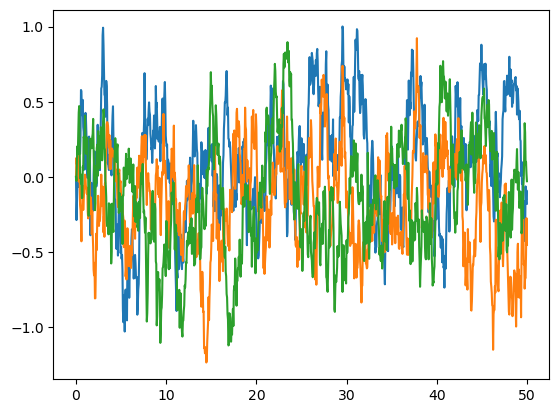

In [11]:
for i in range(0,3):
    plt.plot(t,X[i,:])

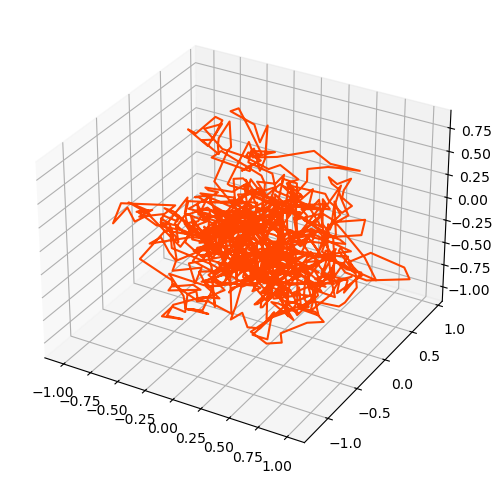

In [24]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d') # Method 2
ax.plot(X[0,:], X[1,:], X[2,:], color = 'orangered')

plt.show()

/Users/ramon/opt/anaconda3/envs/hmm/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ramon/opt/anaconda3/envs/hmm/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ramon/opt/anaconda3/envs/hmm/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


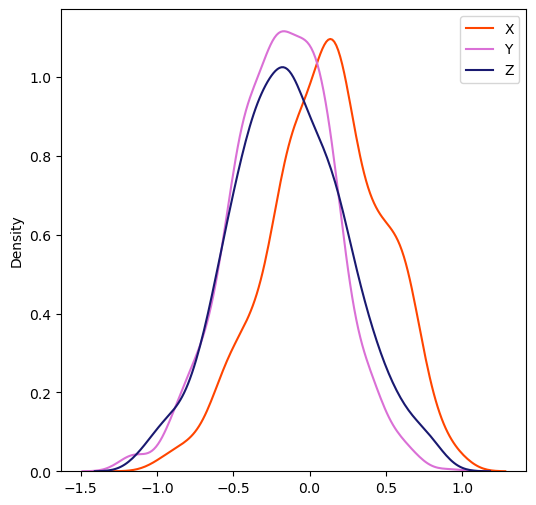

In [39]:
fig,ax  = plt.subplots(1)
fig.set_size_inches((6,6))
sns.kdeplot(X[0,:],label='X',color='orangered',ax=ax)
sns.kdeplot(X[1,:],label='Y',color='orchid',ax=ax)
sns.kdeplot(X[2,:],label='Z',color='midnightblue',ax=ax)
ax.legend()

In [64]:
X_mid = np.median(X[0,:])
X_list =[np.min(X[0,:]),X_mid,np.max(X[0,:])]
X_boundaries = [[np.min(X[0,:]),X_mid],[X_mid,np.max(X[0,:])]]
Y_mid = np.median(X[1,:])
Y_list =[np.min(X[1,:]),Y_mid,np.max(X[1,:])]
Y_boundaries = [[np.min(X[1,:]),Y_mid],[Y_mid,np.max(X[1,:])]]
Z_mid = np.median(X[2,:])
Z_list =[np.min(X[2,:]),Z_mid,np.max(X[2,:])]
Z_boundaries = [[np.min(X[2,:]),Z_mid],[Z_mid,np.max(X[2,:])]]

In [72]:
box_number = 2**3
boxes =[]
boxes_index =[]
for x in X_boundaries:
    for y in Y_boundaries:
        for z in Z_boundaries:
            boxes.append([x,y,z])
            boxes_index.append([X_boundaries.index(x),Y_boundaries.index(y),Z_boundaries.index(z)])

In [60]:
len(boxes)

8

In [80]:
box_timecourse =[]
for t in range(0,steps):
    placed = False
    for xi in range(0,len(X_list)):
        if X[0,t]<X_list[xi]:
            x_pos = xi-1
            break
    for xi in range(0,len(Y_list)):
        if X[1,t]<Y_list[xi]:
            y_pos = xi-1
            break
    for xi in range(0,len(Z_list)):
        if X[2,t]<Z_list[xi]:
            z_pos = xi-1
            break
    box_timecourse.append(boxes_index.index([x_pos,y_pos,z_pos]))

[3,
 3,
 3,
 3,
 3,
 3,
 7,
 7,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 5,
 7,
 3,
 3,
 7,
 7,
 7,
 7,
 7,
 3,
 5,
 1,
 4,
 7,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 4,
 0,
 1,
 1,
 1,
 5,
 5,
 7,
 5,
 1,
 1,
 1,
 5,
 7,
 7,
 5,
 5,
 7,
 7,
 5,
 5,
 5,
 7,
 7,
 7,
 7,
 6,
 6,
 2,
 2,
 2,
 2,
 2,
 6,
 2,
 2,
 2,
 2,
 6,
 6,
 6,
 6,
 7,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 2,
 2,
 3,
 2,
 2,
 3,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 6,
 6,
 1,
 7,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 4,
 0,
 4,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
